# Sales Analysis


In [68]:
import pandas as pd # imports the pandas library and assigns an alias pd ti the library making it easier to reference
import os # imports the os module which provide s a way to interact with the operating system in a platform-independent manner

In [69]:
# Scan the specified directory and store the files and directories in a list called 'files'
files = [file for file in os.scandir('/Users/francischukwudi/Desktop/Portfolio Projects/SalesAnalysis/Sales_Data')]

for file in files: # Iterate over each file in the 'files' list
    print(file) # Print the file or directory path


<DirEntry 'Sales_December_2019.csv'>
<DirEntry 'Sales_April_2019.csv'>
<DirEntry 'Sales_February_2019.csv'>
<DirEntry 'Sales_March_2019.csv'>
<DirEntry 'Sales_August_2019.csv'>
<DirEntry 'Sales_May_2019.csv'>
<DirEntry 'Sales_November_2019.csv'>
<DirEntry 'Sales_October_2019.csv'>
<DirEntry 'Sales_January_2019.csv'>
<DirEntry 'Sales_September_2019.csv'>
<DirEntry 'Sales_July_2019.csv'>
<DirEntry 'Sales_June_2019.csv'>


## Merging the files into one csv

In [70]:
# Obtain a list of files in the specified directory
files = [file for file in os.listdir('/Users/francischukwudi/Desktop/Portfolio Projects/SalesAnalysis/Sales_Data')]
all_months_data = pd.DataFrame() # Create an empty DataFrame to store all the data

for file in files: # Iterate over each file in the list
    df = pd.read_csv("/Users/francischukwudi/Desktop/Portfolio Projects/SalesAnalysis/Sales_Data/"+file) # Read each CSV file and store it in a DataFrame called 'df'
    all_months_data = pd.concat([all_months_data, df]) # Concatenate the current DataFrame with the 'all_months_data' DataFrame

all_months_data.to_csv("all_data.csv", index=False) # Save the combined data to a CSV file called 'all_data.csv' without including the index


## Reading in updated dataframe

In [71]:
all_data = pd.read_csv("all_data.csv") # Read the contents of the CSV file into a DataFrame
all_data.head() # Display the first few rows of the DataFrame

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## Augmenting data with addtional columns

In [72]:
all_data['Month'] = all_data['Order Date'].str[0:2] # Extract the month from the 'Order Date' column and assign it to the 'Month' column
all_data.head() # Display the first few rows of the updated DataFrame

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


## Cleaning Data

In [73]:
def find_rows_with_nan(all_data): # Filter rows that have at least one NaN value
    nan_rows = all_data[all_data.isnull().any(axis=1)]
    return nan_rows

rows_with_nan = find_rows_with_nan(all_data) # Call the function to find rows with NaN values in the 'all_data' DataFrame

print(rows_with_nan) # Display rows with NaN values

       Order ID Product Quantity Ordered Price Each Order Date  \
264         NaN     NaN              NaN        NaN        NaN   
648         NaN     NaN              NaN        NaN        NaN   
680         NaN     NaN              NaN        NaN        NaN   
1385        NaN     NaN              NaN        NaN        NaN   
1495        NaN     NaN              NaN        NaN        NaN   
...         ...     ...              ...        ...        ...   
185795      NaN     NaN              NaN        NaN        NaN   
185868      NaN     NaN              NaN        NaN        NaN   
185887      NaN     NaN              NaN        NaN        NaN   
185960      NaN     NaN              NaN        NaN        NaN   
186580      NaN     NaN              NaN        NaN        NaN   

       Purchase Address Month  
264                 NaN   NaN  
648                 NaN   NaN  
680                 NaN   NaN  
1385                NaN   NaN  
1495                NaN   NaN  
...            

In [74]:
all_data = all_data.dropna() # Drop rows with NaN values from the DataFrame
all_data.head() # Display the first few rows of the updated DataFrame

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [75]:
rows_with_nan = find_rows_with_nan(all_data) # Call the function to find rows with NaN values in the 'all_data' DataFrame
print(rows_with_nan) # Print the DataFrame containing rows with NaN values

Empty DataFrame
Columns: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address, Month]
Index: []


In [76]:
all_data['Month'].unique() # Retrieve the unique values from the 'Month' column

array(['12', 'Or', '01', '04', '05', '02', '03', '08', '09', '06', '11',
       '10', '07'], dtype=object)

### Finding the 'Or' and delete it

In [77]:
# Filter rows where the first two characters of the 'Month' column are equal to "Or"
delete_df = all_data[all_data["Month"].str[0:2] == "Or"]
delete_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
183671,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
184012,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
184041,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
184275,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [78]:
# Filter rows where the value in the 'Month' column is not equal to "Or"
all_data = all_data[all_data["Month"]!="Or"]
all_data.head() # Display the first few rows of the updated DataFrame


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [79]:
all_data['Month'].unique() # Retrieve the unique values from the 'Month' column

array(['12', '01', '04', '05', '02', '03', '08', '09', '06', '11', '10',
       '07'], dtype=object)

In [80]:
all_data['Month'] = all_data['Month'].astype('int32') # Convert the data type of the 'Month' column to integer
all_data.head() # Display the first few rows of the updated DataFrame

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


## Convert columns to accurate data type and adding a sales column

In [81]:
all_data['Price Each'] = all_data['Price Each'].astype('float') # Convert the 'Price Each' column to float data type
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32') # Convert the 'Quantity Ordered' column to integer data type
all_data['Sales'] = all_data['Price Each'] * all_data['Quantity Ordered'] # Calculate the 'Sales' column by multiplying the 'Price Each' and 'Quantity Ordered' columns
all_data.head() # Display the first few rows of the updated DataFrame

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


## Adding a city and state column

In [82]:
# Define a function to extract the city from an address
def get_city(address):
    return address.split(',')[1]
# Define a function to extract the state from an address
def get_state(address):
    return address.split(',')[2].split(' ')[1]
# Apply the functions to the 'Purchase Address' column and create a new 'City' column
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))

all_data.head() # Display the first few rows of the updated DataFrame

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA


### Q1 What was the best month for sales? How much was earned that month?

In [83]:
results = all_data.groupby('Month').sum() # Group the data by 'Month' and calculate the sum of numeric columns
results # Display the aggregated results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


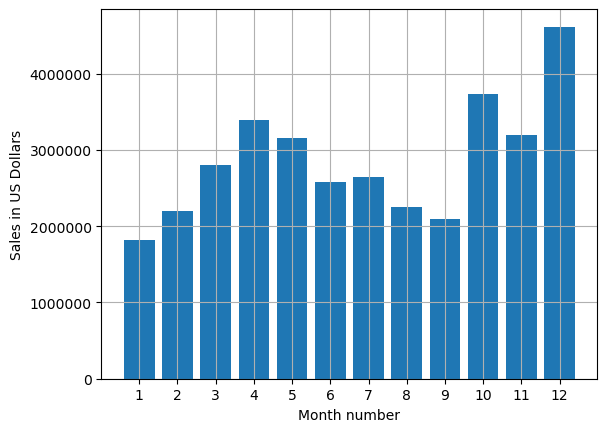

In [84]:
import matplotlib.pyplot as plt
months = range(1,13) # Define the months as a range from 1 to 12

plt.bar(months, results['Sales']) # Create a bar plot using the months and sales values
plt.ticklabel_format(style='plain') # Format the tick labels on the y-axis in plain style (no scientific notation)
plt.grid() # Applies a grid for easy visualization
plt.xticks(months) # Set the x-tick locations to be the months
plt.ylabel('Sales in US Dollars') # Set the label for the y-axis
plt.xlabel('Month number') # Set the label for the x-axis
plt.show() # Display the bar plot

This shows that the month with the most sales was December(represented by the month number 12) and the amount earned was $4613443.34

## Q2. What city had the highest number of sales?

In [85]:
# Group the data by 'City' and calculate the sum of numeric columns
city_results = all_data.groupby('City').sum()
city_results # Display the aggregated results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


In [86]:
# Add a new column 'State' by extracting the state abbreviation from 'Purchase Address'
all_data['State'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1])
all_data.head() # Display the first few rows of the updated DataFrame

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,GA


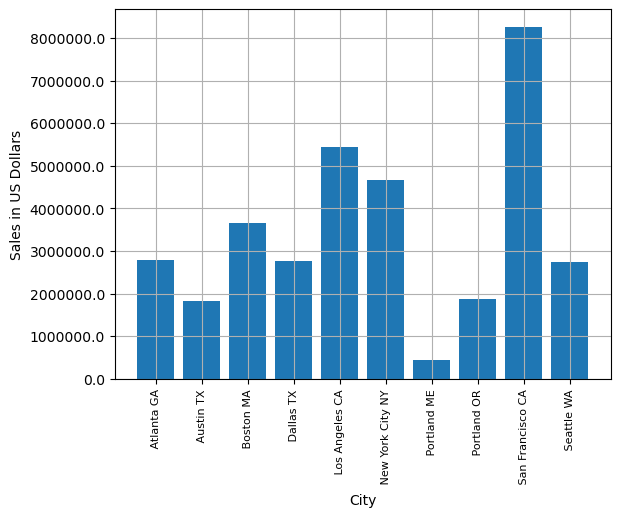

In [87]:
import matplotlib.ticker as ticker
cities = [city for city, df in all_data.groupby('City')] # Create a list of cities by grouping the data
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f')) # Set the y-axis tick formatter to display values with one decimal place
plt.bar(cities, city_results['Sales']) # Create a bar plot using the cities and sales values
plt.grid()
plt.xticks(cities, rotation = 'vertical', size=8) # Set the x-tick labels to be the cities, rotate them vertically, and adjust the size
plt.ylabel('Sales in US Dollars') # Set the label for the y-axis
plt.xlabel('City') # Set the label for the x-axis
plt.show() # Display the bar plot

The city with the highest sales is San Francisco (CA) with $8262203.91

### Q3. What time do we display adverts to maximize the likelihood of the customers buying the product

In [88]:
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,GA


In [89]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date']) # Convert 'Order Date' column to datetime format
all_data['Hour'] = all_data['Order Date'].dt.hour # Extract hour from 'Order Date' and add it as a new column 'Hour'
all_data['Minute'] = all_data['Order Date'].dt.minute # Extract minute from 'Order Date' and add it as a new column 'Minute'
all_data['Count'] = 1 # Add a new column 'Count' with a value of 1 for each row
all_data.head() # Display the updated DataFrame

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,NY,0,1,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,NY,7,3,1
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,NY,18,21,1
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,CA,15,13,1
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,GA,12,38,1


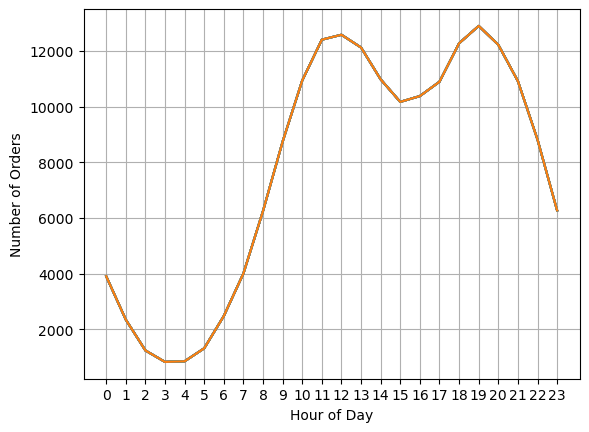

In [90]:
hours = [hour for hour, df in all_data.groupby('Hour')] # Create a list of hours by grouping the data
plt.plot(hours, all_data.groupby(['Hour']).count()) # Plot the number of orders at each hour using a line plot
plt.xticks(hours) # Set the x-tick locations to be the hours
plt.grid() # Add a grid to the plot
plt.xlabel('Hour of Day') # Set the label for the x-axis
plt.ylabel('Number of Orders') # Set the label for the y-axis
plt.show() # Display the line plot

The results show that customers place orders more at 11am and 7pm which should be target times to engage cutomers with adverts or recommendations as they would be on their devices at those times and thsi could theoretically be due to office hours falling within those time periods

### Q4. What products are often sold together?

In [91]:
# Create a new DataFrame with rows containing duplicated 'Order ID' values
dup_df = all_data[all_data['Order ID'].duplicated(keep=False)]
dup_df.head() # Display the first few rows of the new DataFrame

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute,Count
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston MA,MA,12,37,1
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston MA,MA,12,37,1
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston MA,MA,12,37,1
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston MA,MA,12,37,1
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City NY,NY,14,32,1


In [92]:
# Group the data by 'Order ID', concatenate 'Product' values, and store in a new column 'Grouped'
dup_df['Grouped'] = dup_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# Select only 'Order ID' and 'Grouped' columns, drop duplicate rows based on 'Order ID'
dup_df = dup_df[['Order ID', 'Grouped']].drop_duplicates()
dup_df.head() # Display the first few rows of the updated DataFrame


/var/folders/vp/f_n8tq4909j79_t25zywb_9r0000gn/T/ipykernel_17813/2332625694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_df['Grouped'] = dup_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [93]:
from itertools import combinations
from collections import Counter

count = Counter() # Create a Counter object to store the count of combinations
# Iterate over each row in the 'Grouped' column of the 'dup_df' DataFrame
for row in dup_df['Grouped']:     # Split the row into a list of products
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))     # Update the count with combinations of two products from the row
    
count.most_common(10) # Display the 10 most common combinations


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### Q5. What product sold the most and why do you think it sold the most?


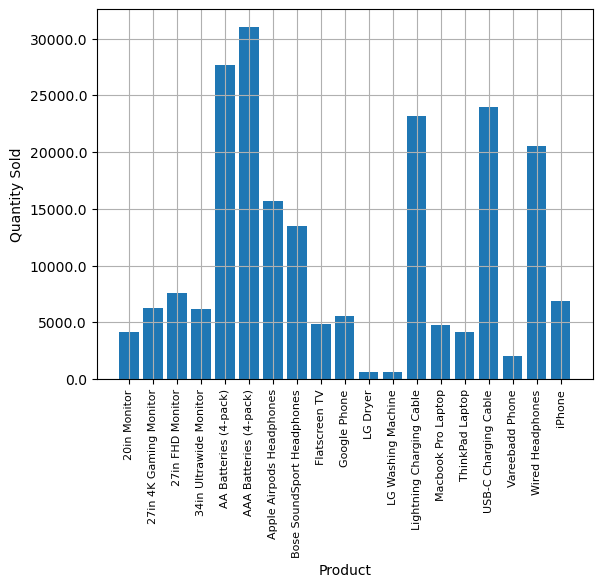

In [94]:
Product_group = all_data.groupby('Product') # Group the data by 'Product' and calculate the sum of 'Quantity Ordered'
quantity_ordered = Product_group.sum()['Quantity Ordered']

Product = [product for product, df in Product_group] # Create a list of products
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))# Set the y-axis format to display as float with one decimal place
plt.grid()
plt.bar(Product, quantity_ordered) # Plot a bar chart with products and quantity sold
plt.xticks(Product, rotation = 'vertical', size=8) # Set the x-tick labels to be the products, with vertical rotation and smaller font size
plt.ylabel('Quantity Sold') # Set the label for the y-axis
plt.xlabel('Product') # Set the label for the x-axis
plt.show() # Display the bar chart


The data shows that the AAA Batteries (4-pack) sold the most with over 30000 packs sold, with this information lets investigate the reason behind this.

In [95]:
Prices = all_data.groupby('Product').mean()['Price Each'] # Group the data by 'Product' and calculate the mean of 'Price Each'
Prices # Display the average prices for each product

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

/var/folders/vp/f_n8tq4909j79_t25zywb_9r0000gn/T/ipykernel_17813/685622503.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Product, rotation='vertical', size=8) # Set the x-tick labels with vertical rotation and smaller font size


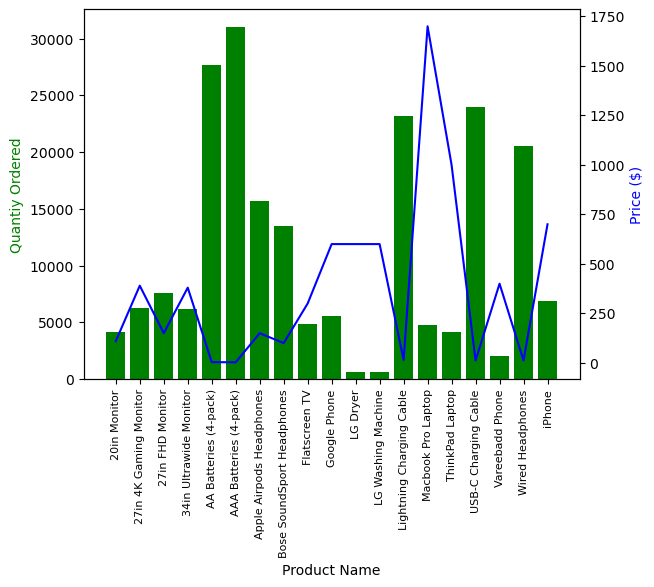

In [96]:
fig, ax1 = plt.subplots()  # Create a figure and an axes object

ax2 = ax1.twinx() # Create a second y-axis that shares the same x-axis
ax1.bar(Product, quantity_ordered, color='g') # Plot the quantity ordered as a bar plot on ax1 with green color
ax2.plot(Product, Prices, 'b-') # Plot the average prices as a line plot on ax2 with blue color

ax1.set_xlabel('Product Name') # Set the label for the x-axis
ax1.set_ylabel('Quantiy Ordered', color='g') # Set the label for the y-axis on ax1 with green color
ax2.set_ylabel('Price ($)', color='b') # Set the label for the y-axis on ax2 with blue color
ax1.set_xticklabels(Product, rotation='vertical', size=8) # Set the x-tick labels with vertical rotation and smaller font size

plt.show() # Display the figure

With this analysis we can assume that the lower the cost of the product there is a likelihood of the product being bought more, further analysis to be carried out. 